In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import os

In [2]:
data = pd.read_csv('../resources/datasets/winequality-red.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
features = data.drop('quality', axis=1)
target = data['quality']

## Applying PCA

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features)
print(features_pca)

[[-13.22490501  -2.02389981]
 [ 22.03772361   4.40832155]
 [  7.16267333  -2.50146086]
 ...
 [ -3.43135351  14.27124349]
 [  1.13287834  16.31616732]
 [ -3.8743766    3.12634754]]


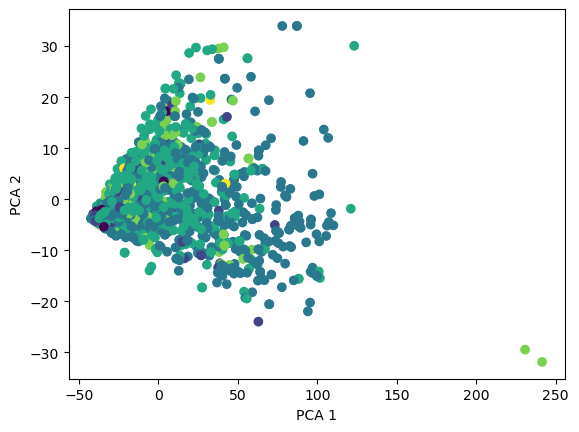

In [6]:
plt.scatter(features_pca[:,0], features_pca[:, 1], c=target)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.savefig('../resources/img/pca_analysis.svg', format='svg')
plt.show()

In [7]:
scaler = StandardScaler()
features_standardized = features.copy()

In [8]:
features.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [9]:
features_standardized[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']] = scaler.fit_transform(features[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']])
features_standardized.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


## Applying PCA manually

In [10]:
def getCovMat(X):
    X_mean = np.mean(X, axis = 0)
    X = X - X_mean
    cov_mat = np.dot(X.T, X)
    return cov_mat

def getCovMatNp(X):
    cov_mat = np.cov(X.T)
    return cov_mat

cov_mat = getCovMat(features)
cov_mat_np = getCovMatNp(features)
np.allclose(cov_mat, cov_mat_np)

False

In [11]:
def getEigen(cov_mat):
    eigen_val, eigen_vec = np.linalg.eig(cov_mat)
    return eigen_val, eigen_vec

eigen_val, eigen_vec = getEigen(cov_mat)
print(eigen_val, eigen_vec.shape)

[1.81182371e+06 9.25807864e+04 4.95588105e+03 2.90742567e+03
 1.67205190e+03 6.61519736e+01 3.70618671e+01 1.81316567e+01
 1.61046186e+01 2.32508608e+00 8.97249302e-04] (11, 11)


In [12]:
def getSortedEigenPair(eigen_values, eigen_vec):
    eigen_pair = [(eigen_values[i], eigen_vec[:, i]) for i in range(len(eigen_values))]
    eigen_pair.sort(reverse=True)
    return eigen_pair

eigen_pair = getSortedEigenPair(eigen_val, eigen_vec)
print(eigen_pair[0])

(1811823.7066671876, array([ 6.13247431e-03, -3.84465551e-04, -1.70902595e-04, -8.64894648e-03,
       -6.37307290e-05, -2.18857434e-01, -9.75678369e-01, -3.72498542e-06,
        2.68008619e-04, -2.23381730e-04,  6.35846721e-03]))


In [13]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features)
pca_features_standardized = pca.fit_transform(features_standardized)

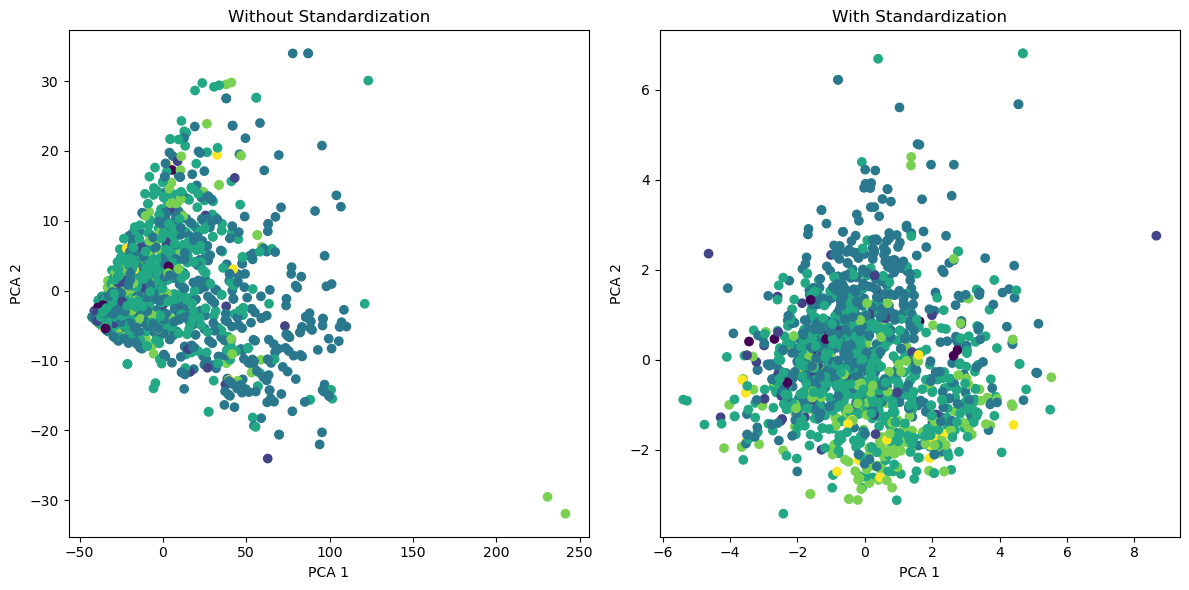

In [15]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the first subplot
axs[0].scatter(features_pca[:, 0], features_pca[:, 1], c=target)
axs[0].set_xlabel('PCA 1')
axs[0].set_ylabel('PCA 2')
axs[0].set_title('Without Standardization')

# Plotting the second subplot
axs[1].scatter(pca_features_standardized[:, 0], pca_features_standardized[:, 1], c=target)
axs[1].set_xlabel('PCA 1')
axs[1].set_ylabel('PCA 2')
axs[1].set_title('With Standardization')

plt.tight_layout()  # Adjusts subplots to prevent overlap
plt.savefig('../resources/img/with_without_standardization.svg', format='svg')
plt.show()


## t-SNE

In [16]:
from sklearn.manifold import TSNE

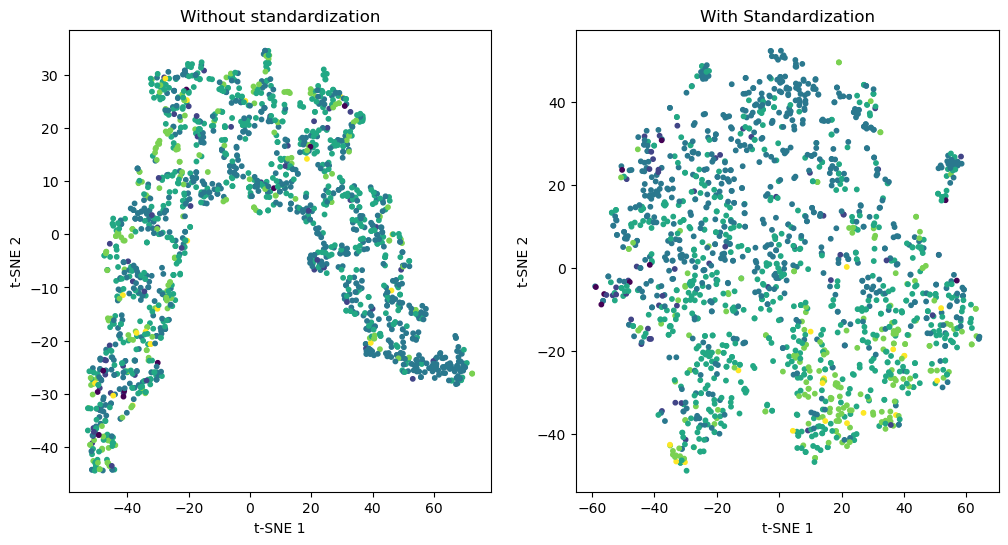

In [17]:
tsne = TSNE(n_components=2, random_state=44)

feature_tsne = tsne.fit_transform(features)
feature_tsne_standardized = tsne.fit_transform(features_standardized)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(feature_tsne[:,0], feature_tsne[:,1], c=target, marker='o', s=10)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('Without standardization')

plt.subplot(1,2,2)
plt.scatter(feature_tsne_standardized[:,0],
           feature_tsne_standardized[:, 1], c=target, marker='o', s=10)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.savefig('../resources/img/applying_tSNE.svg', format='svg')
plt.title('With Standardization')
plt.show()

## UMAP

In [18]:
!pip install umap-learn

In [18]:
import umap

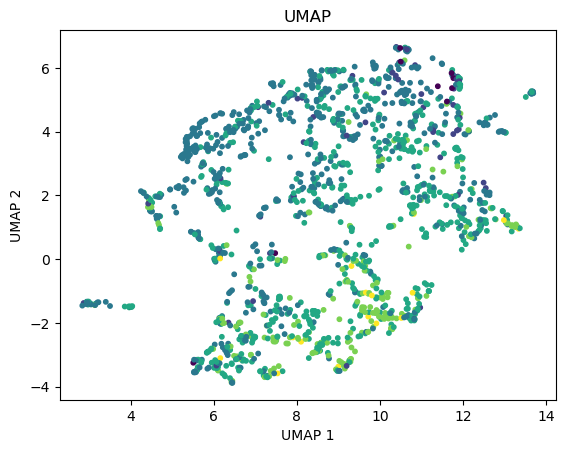

In [19]:
features_umap = umap.UMAP(n_components=2, random_state=42, n_jobs=1)
features_umap_transform = features_umap.fit_transform(features_standardized)

plt.scatter(features_umap_transform[:,0], features_umap_transform[:,1], c=target, 
           marker='o', s=10)

plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('UMAP')
plt.savefig('../resources/img/umap_transform.svg', format='svg')

## Statistics

In [20]:
data.head(18)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [21]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [22]:
import pandas as pd


correlation_matrix = data.corr()
quality_correlations = correlation_matrix['quality'].sort_values(ascending=False)
print(quality_correlations)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


In [23]:
from scipy.stats import f_oneway

group1 = data[data['quality'] == 8]['alcohol']
group2 = data[data['quality'] == 7]['alcohol']
# group3 = data[data['quality'] == 6]['alcohol']
# group4 = data[data['quality'] == 5]['alcohol']
# group5 = data[data['quality'] == 4]['alcohol']
# group6 = data[data['quality'] == 3]['alcohol']


f_statistic, p_value = f_oneway(group1, group2)#, group3, group4, group5, group6)
print(f_statistic, p_value)

6.718523315536327 0.010195821603175767


In [24]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

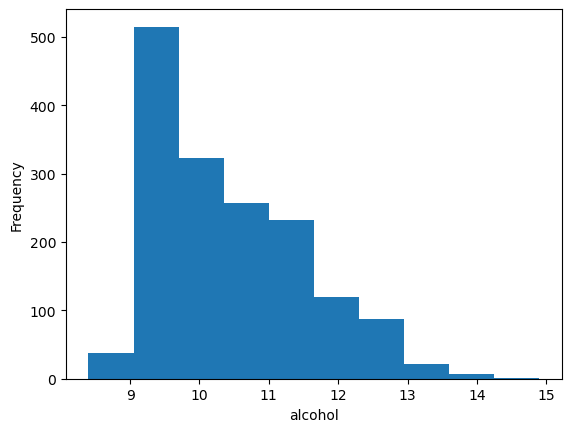

In [25]:
plt.hist(features['alcohol'])
plt.xlabel('alcohol')
plt.ylabel('Frequency')
plt.savefig('../resources/img/alcoholvsfrequency.svg', format='svg')
plt.show()

In [ ]:
sns.boxplot(x=data['quality'], y=data['alcohol'])


In [ ]:
import statsmodels.api as sm

In [ ]:
sm.qqplot(data['alcohol'], line='45')
plt.show()

In [35]:
correlation = data['alcohol'].corr(data['quality'])
if correlation > 0:
    print('Correlation value: {}. \n So, there is +ve correlation between Alcohol and Quality'.format(correlation))
elif correlation < 0:
    print('Correlation value: {}. \n So, there is -ve correlation between Alcohol and Quality'.format(correlation))
else:
    print('Correlation value: {}. \nSo, there is no correlation between Alcohol and Quality'.format(correlation))

Correlation value: 0.4761663240011354. 
 So, there is +ve correlation between Alcohol and Quality


## Hypothesis

$H_{0}$: there is no significant difference between high and low quality wine

$H_{1}$: there is significant difference between high and low quality wine

In [30]:
high_quality = data[data['quality'] >= 7]['alcohol']
low_quality = data[data['quality'] < 7]['alcohol']

In [31]:
from scipy.stats import f_oneway

f_statistic, p_value = f_oneway(high_quality, low_quality)


if p_value < 0.05:
    print("Value of p: {}. We reject the null hypothesis.".format(p_value))
else:
    print("Value of p: {}. We accept null hypothesis.".format(p_value))

Value of p: 6.016774226321021e-65. We reject the null hypothesis.


In [28]:
group_8 = data[data['quality'] == 8]['alcohol']
group_6 = data[data['quality'] == 6]['alcohol']

from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(group_8, group_6)
print(t_statistic, p_value)

5.812305472162966 9.631637542891904e-09
